In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df=pd.read_csv("afterDJIA.csv")

In [3]:
len(df)

7420

In [4]:
df['cash']=0
df['action']=""
df['action1']=""
class Portfolio:
    def __init__(self):
        self.profit=0
        self.last_action=None
        self.last_price=0
        self.last_quantity=0
        self.brok_rate=0.0010
        self.capital=2000000
        self.margin=2000000
        
    def long(self,t):
        df['cash'][t]=self.margin
        self.last_quantity=self.margin//df['Close'][t]
        self.margin=self.margin%df['Close'][t]
        self.last_price=df['Close'][t]
        self.last_action='bought'
        print('open long @',self.last_price)
        df['action'][t]="long"
        df['action1'][t]="long"
        
    def close_long(self,t):
        tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
        tprofit=(df['Close'][t]-self.last_price-tbrokerage)*self.last_quantity
        self.profit=self.profit+tprofit
        self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit)
        df['cash'][t]=self.margin        
        print('close long @',df['Close'][t])
        self.last_action=None
        df['action'][t]="close long"
        df['action1'][t]="short"
        
    def short(self,t):
        df['cash'][t]=self.margin        
        self.last_quantity=self.margin//df['Close'][t]
        self.margin=self.margin%df['Close'][t]
        self.last_price=df['Close'][t]
        self.last_action='sold'        
        print('open short @',self.last_price)
        df['action'][t]="short"
        df['action1'][t]="short"
        
    def close_short(self,t):
        tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
        tprofit=(self.last_price-df['Close'][t]-tbrokerage)*self.last_quantity
        self.profit=self.profit+tprofit
        self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit)
        df['cash'][t]=self.margin      
        print('close short @',df['Close'][t])
        self.last_action=None
        df['action'][t]="close short"
        df['action1'][t]="long"
        
    def copy_Buy(self,t):
        df['cash'][t]=self.margin+(self.last_quantity*df['Close'][t])
        
    def copy_Sell(self,t):
        tp=(self.last_price-df['Close'][t])*self.last_quantity
        original=self.margin+(self.last_quantity*self.last_price)
        df['cash'][t]=original+tp
        
    def copy_None(self,t):
        df['cash'][t]=self.margin       
        
        
        
    def action(self,signal,t):
        if signal=='Buy' and self.last_action==None:
            self.long(t)
        elif signal=='Buy' and self.last_action=='sold':
            self.close_short(t)
            self.long(t)
        elif signal=='Buy' and self.last_action=='bought':
            self.copy_Buy(t)            
        elif signal=='Sell' and self.last_action==None:
            self.short(t)
        elif signal=='Sell' and self.last_action=='bought':
            self.close_long(t)
            self.short(t)
        elif signal=='Sell' and self.last_action=='sold':
            self.copy_Sell(t)
        elif signal=='hold':
            if self.last_action==None:
                self.copy_None(t)
            elif self.last_action=='bought':
                self.copy_Buy(t)                
            elif self.last_action=='sold':
                self.copy_Sell(t)  
                
        
    def result(self,t):        
        if self.last_action=='sold':
            tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
            tprofit=(self.last_price-df['Close'][t]-tbrokerage)*self.last_quantity
            self.profit=self.profit+tprofit
            self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit) 
            df['cash'][t]=self.margin
            self.last_action=None
            df['action'][t]="close short"
            df['action1'][t]="long"
        elif self.last_action=='bought':
            tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
            tprofit=(df['Close'][t]-self.last_price-tbrokerage)*self.last_quantity
            self.profit=self.profit+tprofit
            self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit) 
            df['cash'][t]=self.margin
            self.last_action=None
            df['action'][t]="close long"
            df['action1'][t]="short"
        print("\n***********************")
        print("Profit is ",self.profit)
        print("Initial Capital is ",self.capital)    
        print("Current Capital is ",self.margin)
        roi=((self.margin-self.capital)/self.capital)*100
        print("%ROI is ",roi)
        
        

In [5]:
    agent=Portfolio()
    for i in range(7049,7419):  
        ls=[0,0,0]
        ls[0]=df['rsitf'][i]
        ls[1]=df['rtf'][i]
        ls[2]=df['ccitf'][i]
        z0=ls.count(0)
        z1=ls.count(1)
        z2=ls.count(2)
        y=[z0,z1,z2]
        z3=y.index(max(y))
        #t=df['y_pred'][i]
        #print(i,t)
        #print("p={}ta={}".format(t,z3))
        if (z3==1):
            agent.action('Buy',i)    
            print("buy")
        elif (z3==2):
            agent.action('Sell',i)  
            print("sell")
        else:
            agent.action('hold',i)        
    agent.result(i)
    bnh=((df['Close'][7419]-df['Close'][7049])/df['Close'][7049])*100
    print("Buy and Hold=",bnh)

/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to 

open short @ 26405.759765625
sell
sell
sell
sell
close short @ 25052.830078125


/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to 

open long @ 25052.830078125
buy
buy
buy
buy


/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


close long @ 25954.439453125
open short @ 25954.439453125
sell
sell
close short @ 25324.990234375
open long @ 25324.990234375
buy
buy
buy
close long @ 26966.0
open short @ 26966.0
sell
sell
sell
sell
close short @ 25717.740234375
open long @ 25717.740234375
buy
close long @ 27783.58984375
open short @ 27783.58984375
sell
sell
sell
sell
sell
sell
sell
sell
sell
sell

***********************
Profit is  562385.7504804689
Initial Capital is  2000000
Current Capital is  2562385.750480469
%ROI is  28.119287524023445
Buy and Hold= 16.378726944657274


/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#0-hold 1-buy 2-sell

In [7]:
len(df)

7420

In [8]:
#df.iloc[6028]

In [9]:
df.to_csv('tf.csv')

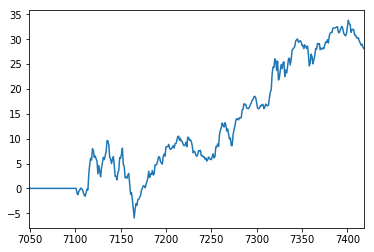

In [16]:
(((df['cash'].iloc[7049:-1]-2000000)/2000000)*100).plot()

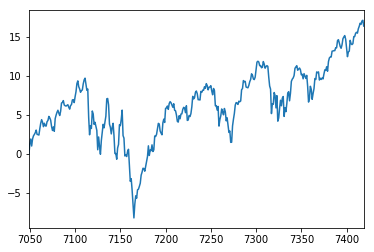

In [17]:
(((df['Close'].iloc[7049:]-24457)/24457)*100).plot()

In [12]:
df.Close.iloc[7049]

24456.48046875